#HW2 - Algorithm Implementation and Basic Model Selection

In [62]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initializing Datasets, Settings, Functions....

In [63]:
# load prepared files from HW1

!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving test_df_prepared.csv to test_df_prepared.csv
Saving train_df_prepared.csv to train_df_prepared.csv


In [65]:
# Setting train, test

train, test = pd.read_csv('train_df_prepared.csv'), pd.read_csv('test_df_prepared.csv')

In [66]:
# plt formatting

from matplotlib import pylab
params = {'xtick.labelsize': 18,
'ytick.labelsize': 18,
'axes.titlesize' : 22,
'axes.labelsize' : 20,
'legend.fontsize': 18,
'legend.title_fontsize': 22,
'figure.titlesize': 24 }
pylab.rcParams.update(params)

In [67]:
# given function

def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


#OUR CODE STARTS HERE

In [68]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [69]:
# extracting PCR_01 and PCR_08

train_df1 = train[['PCR_01', 'PCR_08', 'spread']].copy()
test_df1 = test[['PCR_01', 'PCR_08', 'spread']].copy()
train_df1_X, train_df1_Y = train_df1[['PCR_01', 'PCR_08']], train_df1['spread']
test_df1_X, test_df1_Y = test_df1[['PCR_01', 'PCR_08']], test_df1['spread']

In [70]:
# training KNN with N=1

knn_1 = KNC(1)
knn_1.fit(train_df1_X, train_df1_Y)

KNeighborsClassifier(n_neighbors=1)

In [71]:
# calculate KNN accuracy with N=1

knn_1_train_accuracy = knn_1.score(train_df1_X, train_df1_Y) * 100
knn_1_test_accuracy = knn_1.score(test_df1_X, test_df1_Y) * 100

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


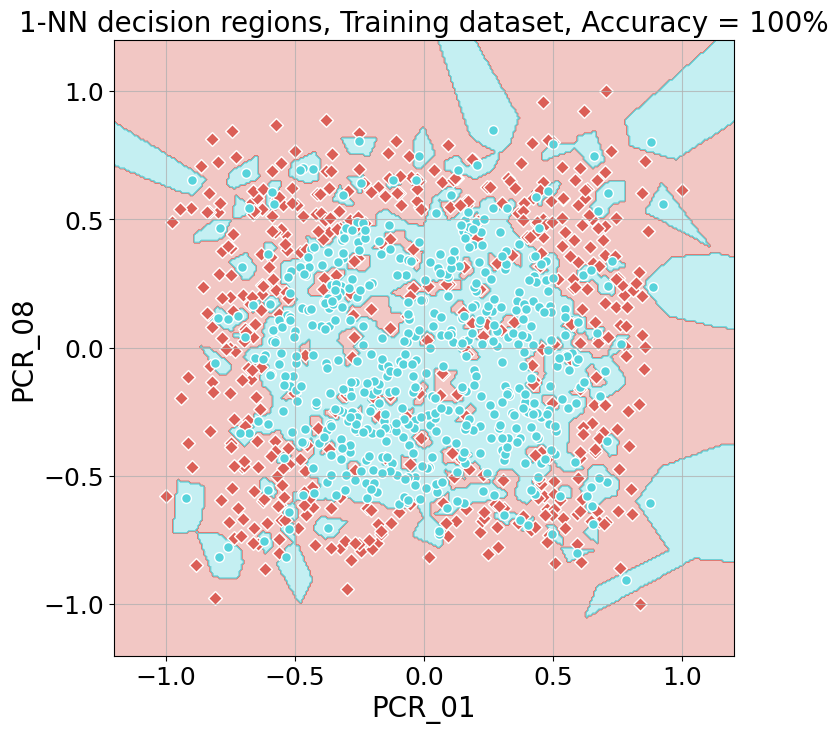

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


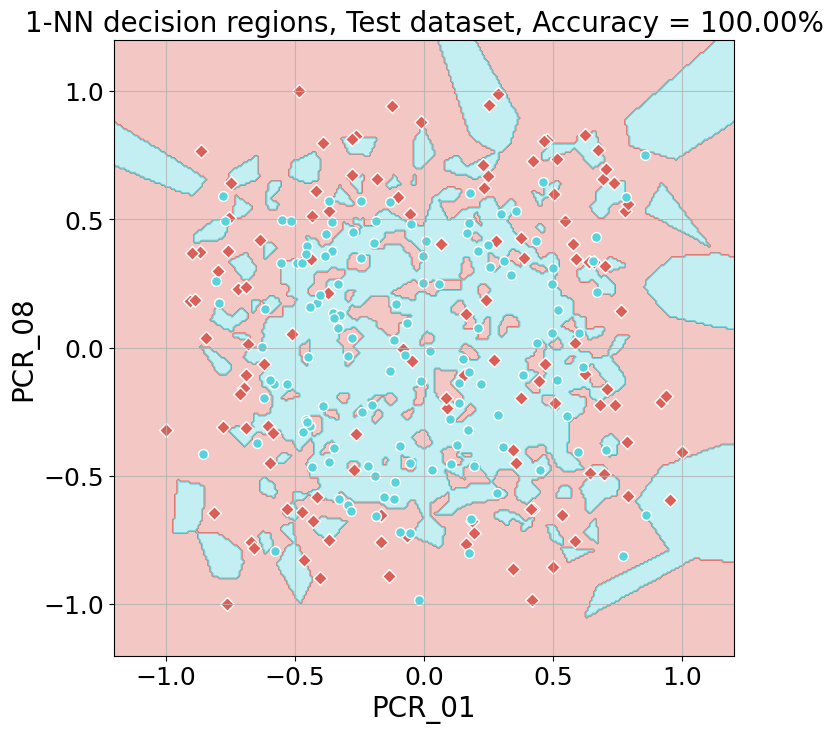

In [72]:
# plot decision regions for N=1

visualize_clf(knn_1, train_df1_X, train_df1_Y, f'1-NN decision regions, Training dataset, Accuracy = {knn_1_train_accuracy:.0f}%', 'PCR_01', 'PCR_08')
visualize_clf(knn_1, test_df1_X, test_df1_Y, f'1-NN decision regions, Test dataset, Accuracy = {knn_1_train_accuracy:.2f}%', 'PCR_01', 'PCR_08')

In [73]:
# train KNN with different N's, collect scores

from sklearn.model_selection import cross_validate as CV

k_range = list(range(1, 20, 2)) + list(range(20, 695, 65))

train_scores = []
validation_scores = []
for k in k_range:
    cv_result = CV(KNC(k), train_df1_X, train_df1_Y, cv=8, return_train_score=True)
    train_scores.append(cv_result['train_score'])
    validation_scores.append(cv_result['test_score'])


In [74]:
# calculate mean for scores

train_scores_means = [np.mean(score_array) for score_array in train_scores]
validation_scores_means = [np.mean(score_array) for score_array in validation_scores]

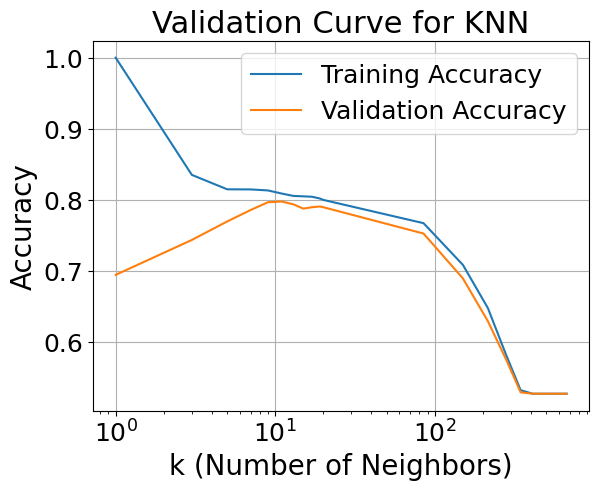

In [75]:
# plot accuracies

plt.semilogx(k_range, train_scores_means, label='Training Accuracy')
plt.semilogx(k_range, validation_scores_means, label='Validation Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


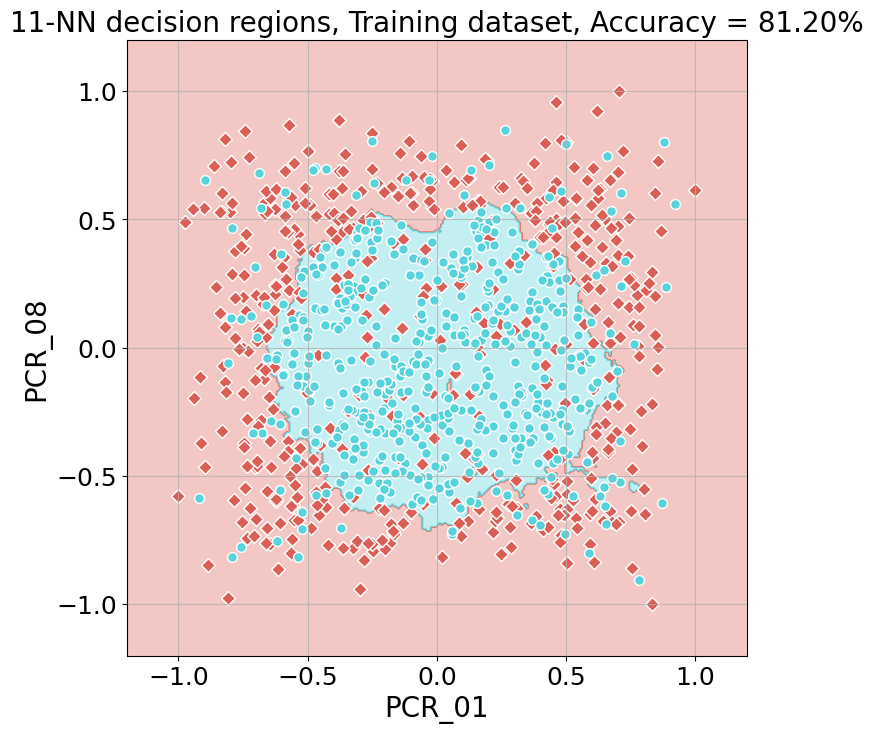

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


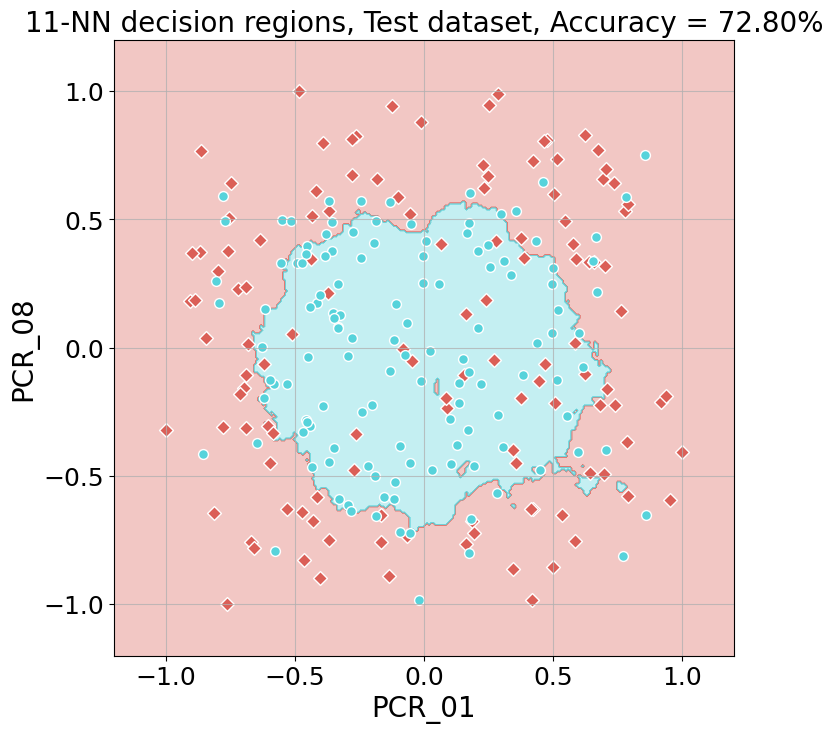

The test accuracy for k=11 is: 72.80%


In [76]:
# train KNN model with N=11, plot decision regions and accuracies

knn_11_model = KNC(11)
knn_11_model.fit(train_df1_X, train_df1_Y)
knn_11_train_accuracy = knn_11_model.score(train_df1_X, train_df1_Y) * 100
knn_11_test_accuracy = knn_11_model.score(test_df1_X, test_df1_Y) * 100
visualize_clf(knn_11_model, train_df1_X, train_df1_Y, f'11-NN decision regions, Training dataset, Accuracy = {knn_11_train_accuracy:.2f}%', 'PCR_01', 'PCR_08')
visualize_clf(knn_11_model, test_df1_X, test_df1_Y, f'11-NN decision regions, Test dataset, Accuracy = {knn_11_test_accuracy:.2f}%', 'PCR_01', 'PCR_08')
print(f"The test accuracy for k=11 is: {knn_11_test_accuracy:.2f}%")


In [77]:
# train ID3 with depth = 3

from sklearn.tree import DecisionTreeClassifier, plot_tree

id3_d3_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
train_X = train[['PCR_04', 'PCR_06', 'SpecialProperty']].copy()
train_Y = train[['risk']].copy()
test_X = test[['PCR_04', 'PCR_06', 'SpecialProperty']].copy()
test_Y = test[['risk']].copy()

id3_d3_model.fit(train_X,train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [78]:
# get the accuracy of the model

print(f"The training accuracy of ID3 model with max_depth=3 is: {id3_d3_model.score(train_X, train_Y) * 100:.2f}%.")

The training accuracy of ID3 model with max_depth=3 is: 67.80%.


[Text(0.5, 0.875, 'SpecialProperty <= 0.5\nentropy = 1.0\nsamples = 1000\nvalue = [491, 509]\nclass = 1'),
 Text(0.25, 0.625, 'PCR_04 <= 0.446\nentropy = 0.929\nsamples = 497\nvalue = [171, 326]\nclass = 1'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'PCR_06 <= -0.591\nentropy = 0.984\nsamples = 389\nvalue = [166, 223]\nclass = 1'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]\nclass = 1'),
 Text(0.1875, 0.125, 'entropy = 0.997\nsamples = 354\nvalue = [166, 188]\nclass = 1'),
 Text(0.375, 0.375, 'PCR_06 <= -0.034\nentropy = 0.27\nsamples = 108\nvalue = [5, 103]\nclass = 1'),
 Text(0.3125, 0.125, 'entropy = 0.451\nsamples = 53\nvalue = [5, 48]\nclass = 1'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 55\nvalue = [0, 55]\nclass = 1'),
 Text(0.75, 0.625, 'PCR_06 <= 0.26\nentropy = 0.946\nsamples = 503\nvalue = [320, 183]\nclass = -1'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'PCR_04 <= -0.467\nentropy = 0.999\nsamples = 339\nvalue = [174, 165]\n

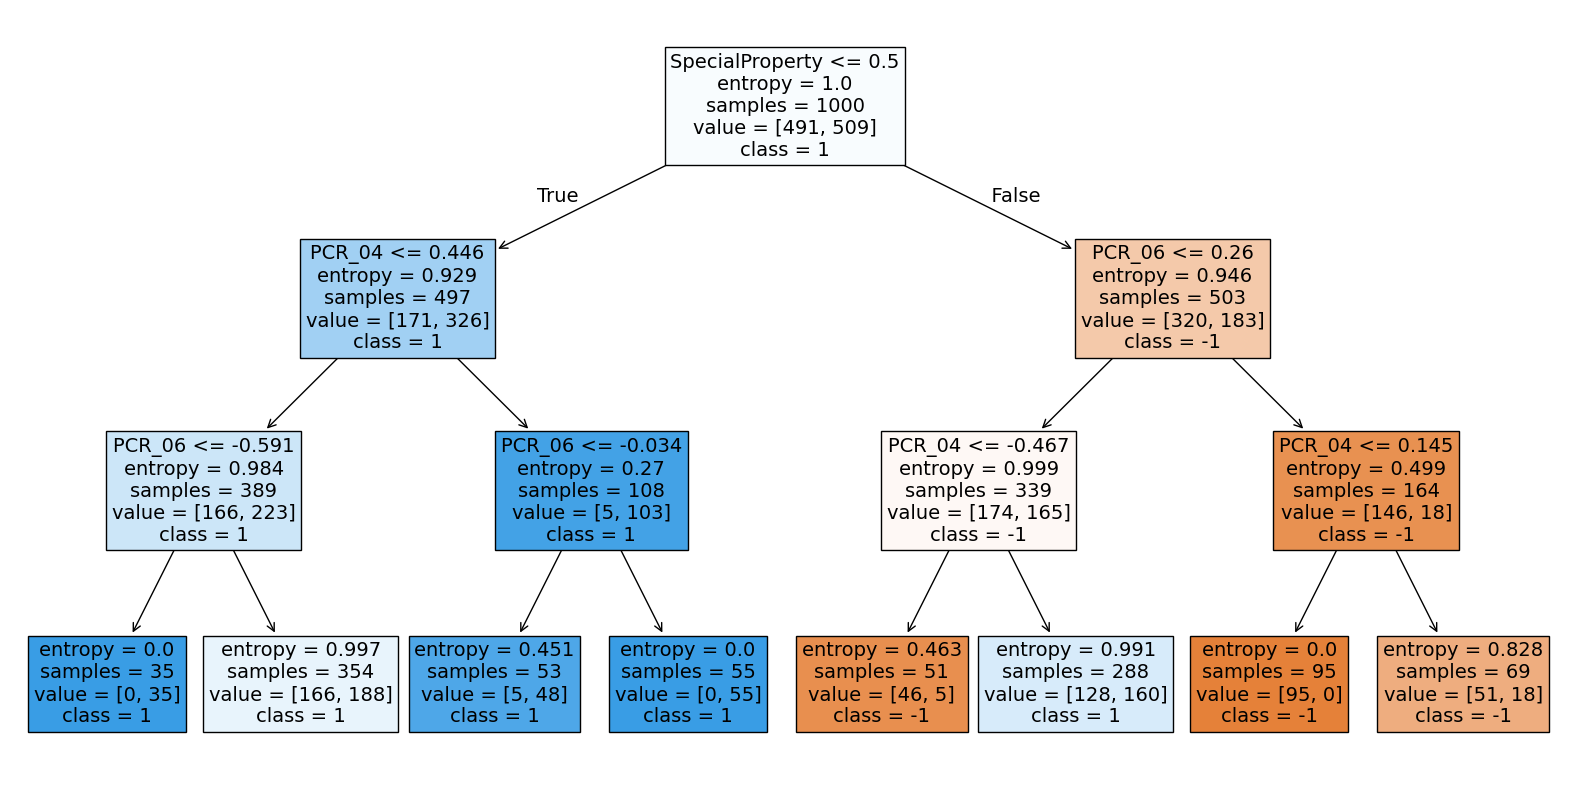

In [79]:
# plot the decision tree

plt.figure(figsize=(20, 10))
plot_tree(id3_d3_model, feature_names=['PCR_04', 'PCR_06', 'SpecialProperty'], class_names=['-1', '1'], filled=True, fontsize=14)

In [80]:
# perform a grid search over max_depth and min_samples_leaf

from sklearn.model_selection import GridSearchCV

param_grid = {
       'max_depth':  list(range(3, 23)),
       'min_samples_leaf': list(range(1, 21))
   }

GSCV = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), param_grid, cv=5, return_train_score=True)
GSCV.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             return_train_score=True)

In [81]:
# get the cross validation results

cv_results = GSCV.cv_results_

train_scores = cv_results['mean_train_score'].reshape(len(param_grid['max_depth']), len(param_grid['min_samples_leaf']))
validation_scores = cv_results['mean_test_score'].reshape(len(param_grid['max_depth']), len(param_grid['min_samples_leaf']))

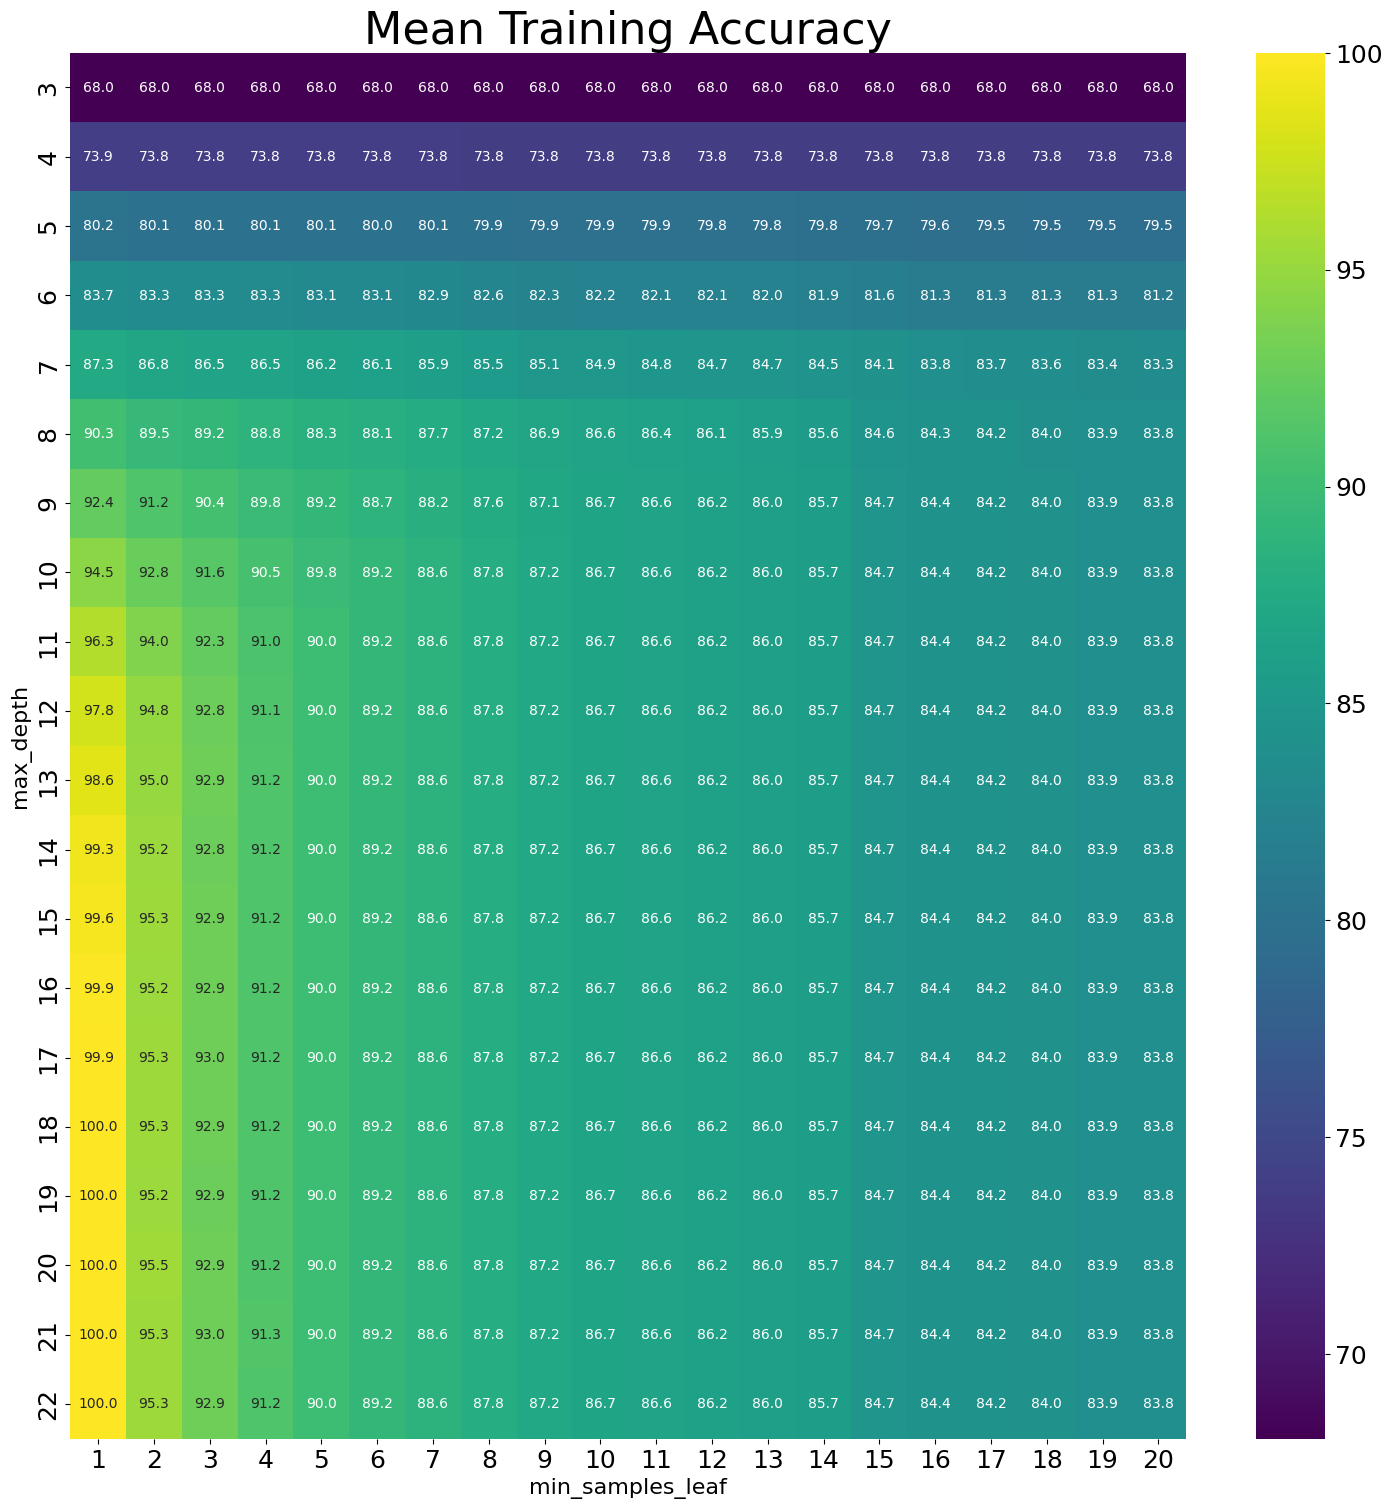

In [82]:
# plot heatmap of train scores

plt.figure(figsize=(18,18))
training_heatmap = sns.heatmap(train_scores * 100, annot=True, fmt=".1f", cmap="viridis", xticklabels=param_grid['min_samples_leaf'], yticklabels=param_grid['max_depth'])
plt.title("Mean Training Accuracy", fontsize=32)
plt.xlabel("min_samples_leaf", fontsize=16)
plt.ylabel("max_depth", fontsize=16)
plt.show()

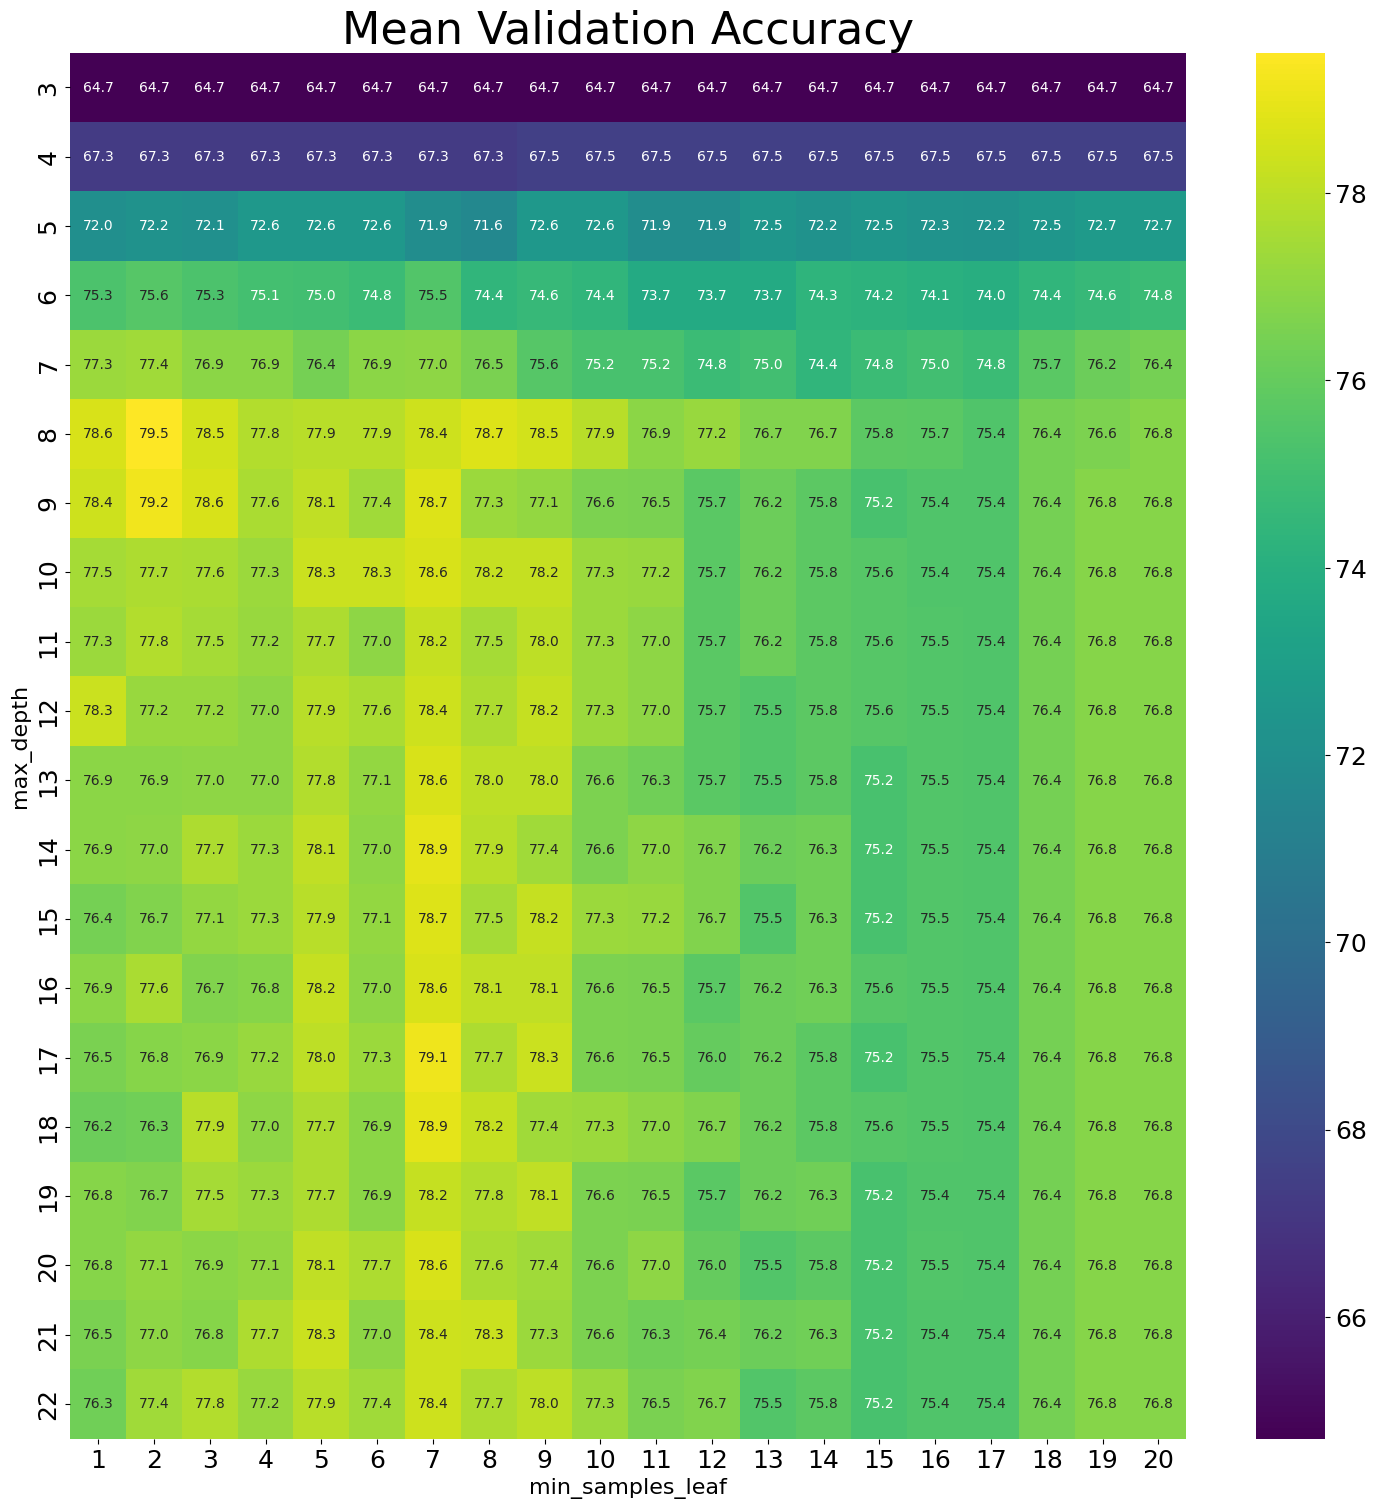

In [83]:
# plot heatmap of validation scores

plt.figure(figsize=(18,18))
training_heatmap = sns.heatmap(validation_scores * 100, annot=True, fmt=".1f", cmap="viridis", xticklabels=param_grid['min_samples_leaf'], yticklabels=param_grid['max_depth'])
plt.title("Mean Validation Accuracy", fontsize=32)
plt.xlabel("min_samples_leaf", fontsize=16)
plt.ylabel("max_depth", fontsize=16)
plt.show()

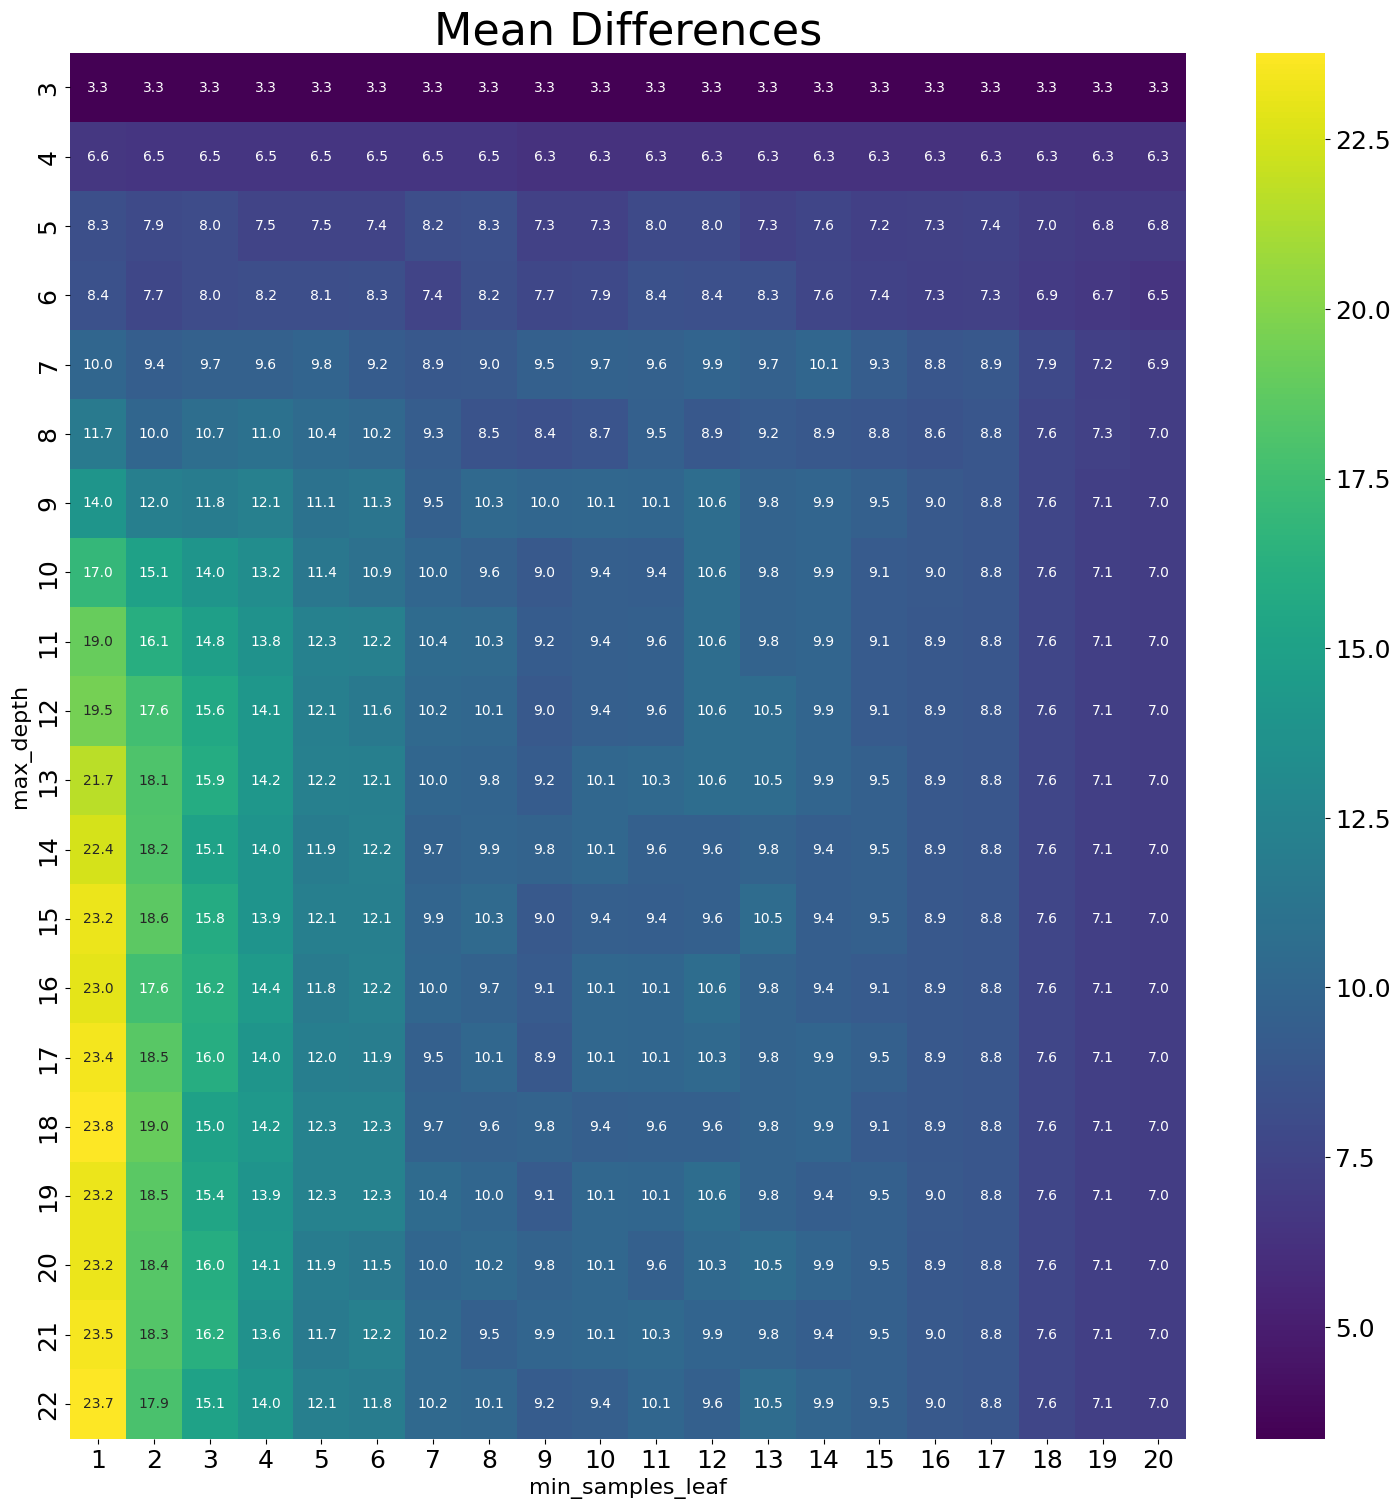

In [84]:
# plot heatmap of difference between train and validation scores

plt.figure(figsize=(18,18))
training_heatmap = sns.heatmap((train_scores - validation_scores) * 100, annot=True, fmt=".1f", cmap="viridis", xticklabels=param_grid['min_samples_leaf'], yticklabels=param_grid['max_depth'])
plt.title("Mean Differences", fontsize=32)
plt.xlabel("min_samples_leaf", fontsize=16)
plt.ylabel("max_depth", fontsize=16)
plt.show()

In [85]:
# train a decision tree with the optimal values

optimal_decision_tree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, criterion="entropy")
optimal_decision_tree.fit(train_X, train_Y)
print(f"The test accuracy of optimal decision tree is: {optimal_decision_tree.score(test_X, test_Y) * 100:.2f}%.")

The test accuracy of optimal decision tree is: 75.60%.


## SOFT-SVM MODULE

In [86]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np


class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """

    def __init__(self, C: float, lr: float = 1e-5, batch_size=32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        sum = np.sum(np.maximum(0, 1 - hinge_inputs))
        loss = norm ** 2 + C * sum

        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        f_hinge_inputs = np.where(hinge_inputs < 1, -1, 0)
        fy_prod = np.multiply(f_hinge_inputs, y.reshape(-1, 1))
        w_sum = np.sum(np.multiply(fy_prod, X), axis=0)
        b_sum = np.sum(fy_prod)

        g_w = 2 * w + C * w_sum
        g_b = C * b_sum

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr * g_w
            self.b = self.b - self.lr * g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = np.sign(X.dot(self.w) + self.b)
        y_pred[y_pred == 0] = 1

        return y_pred


## GIVEN VERIFY GRADIENTS

In [87]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()



## OUR CODE CONTINUED

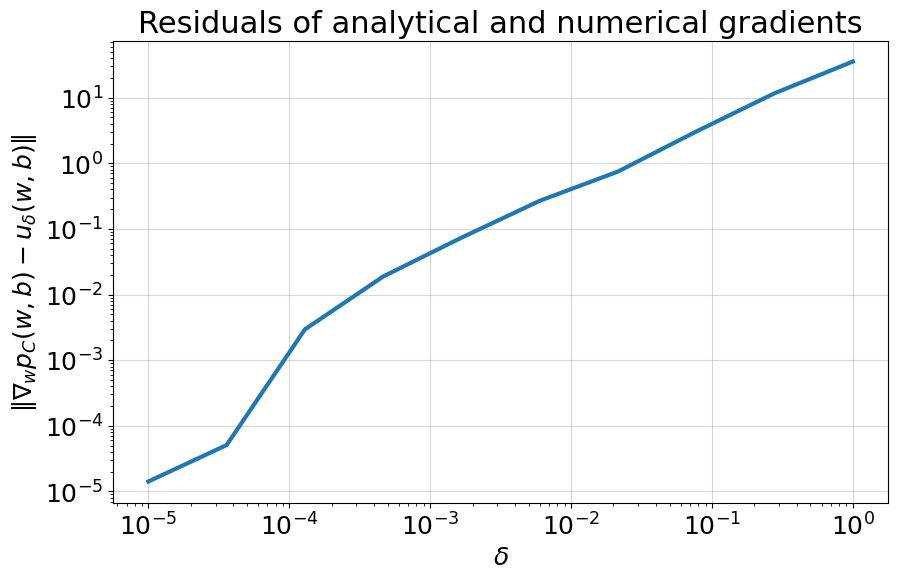

In [89]:
# compare numerical and implemented analytic gradients

X_train = np.array(train[["PCR_01","PCR_08"]].copy())
y_train = np.array(train[["spread"]].copy())
compare_gradients(X_train, y_train, deltas=np.logspace(-5,0,10))

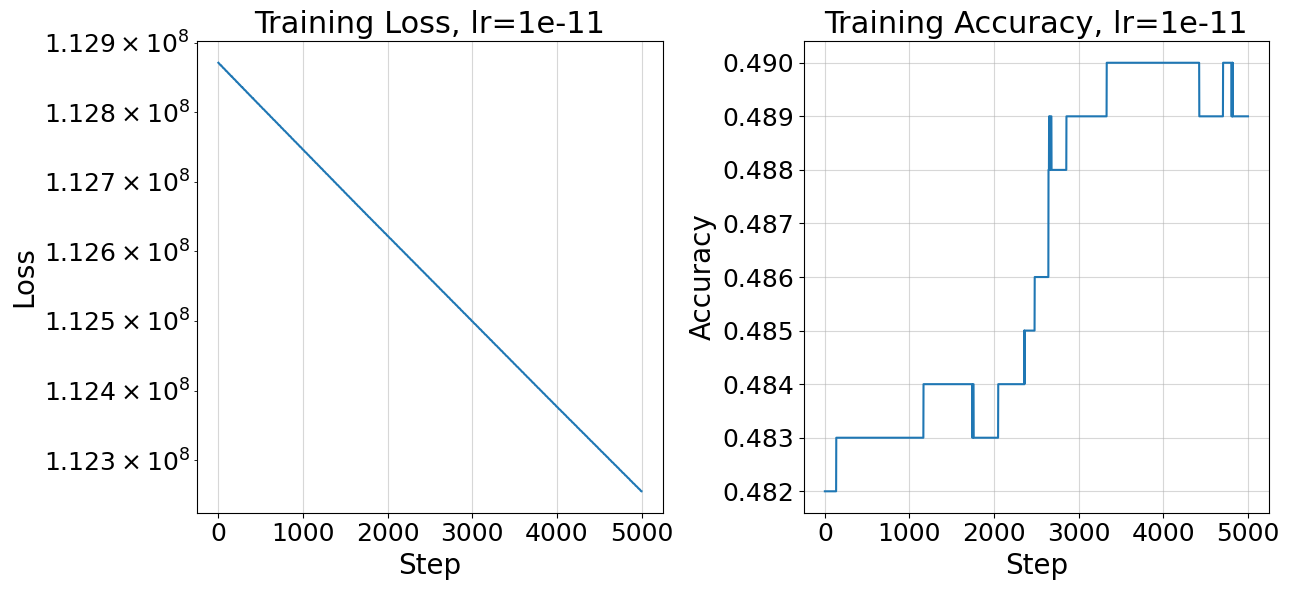

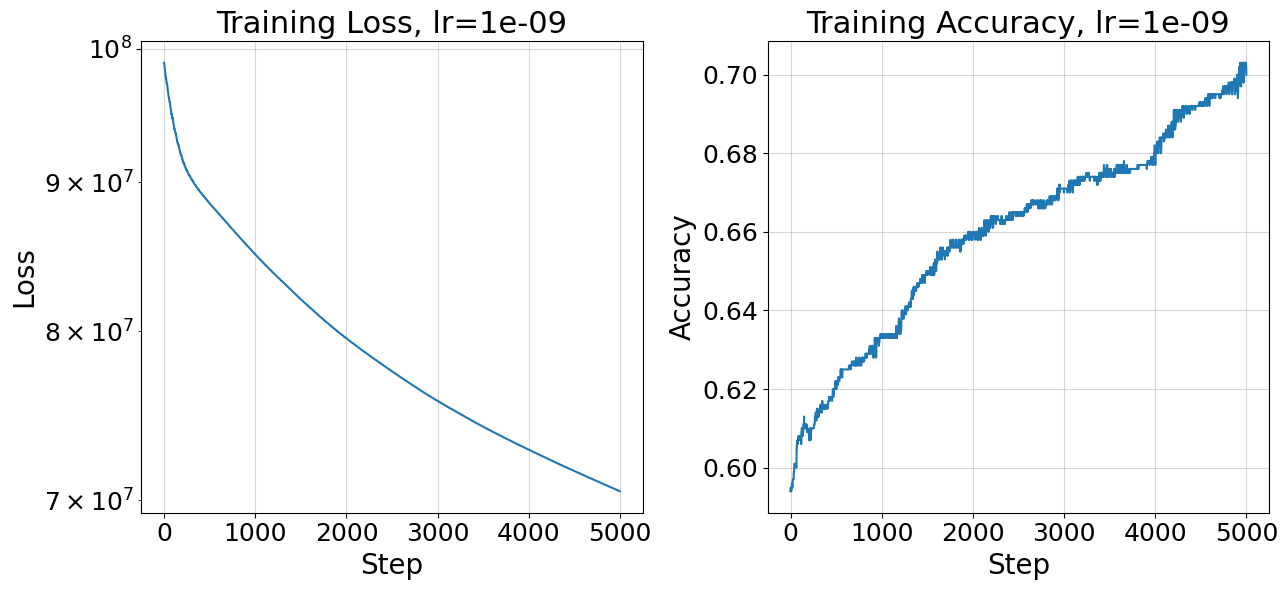

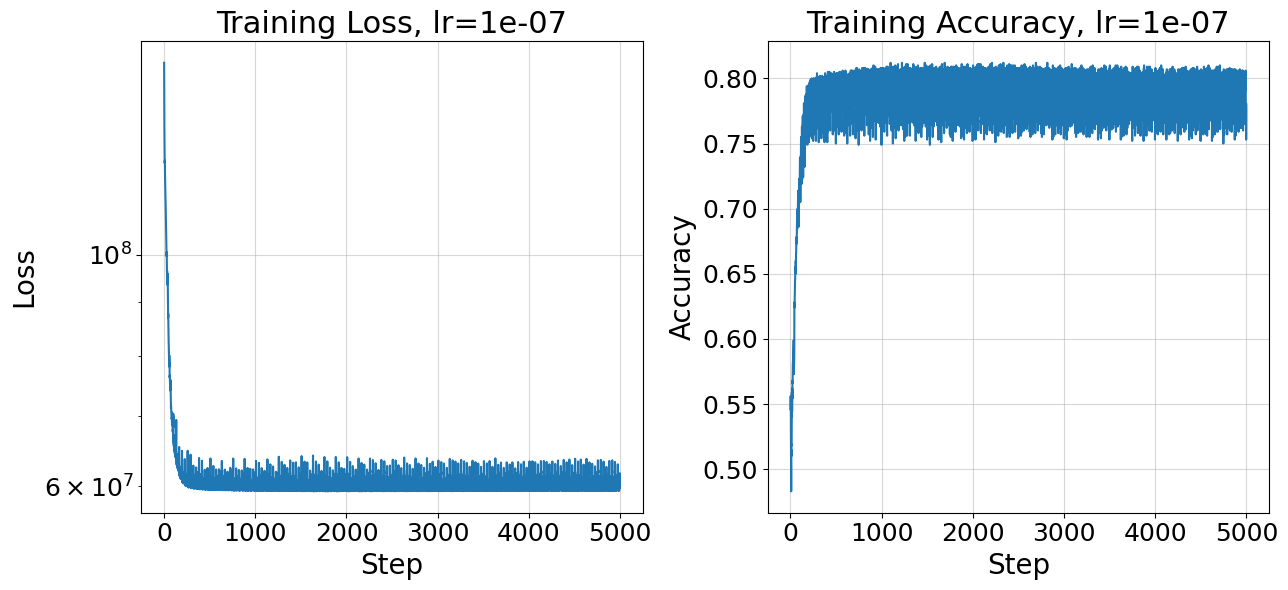

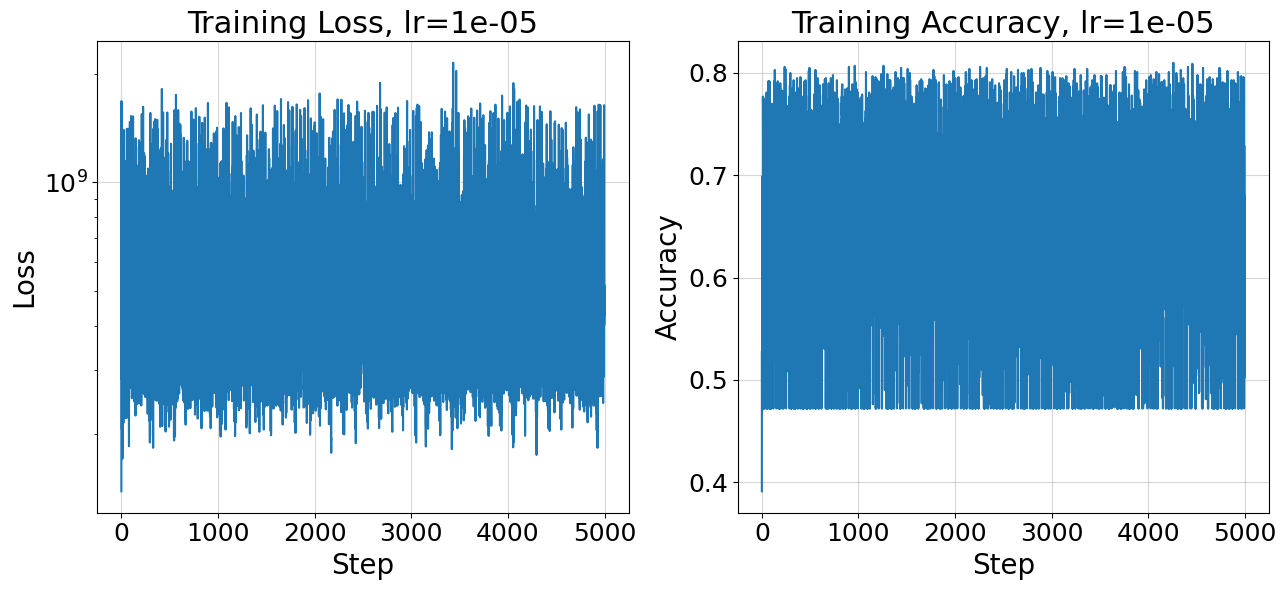

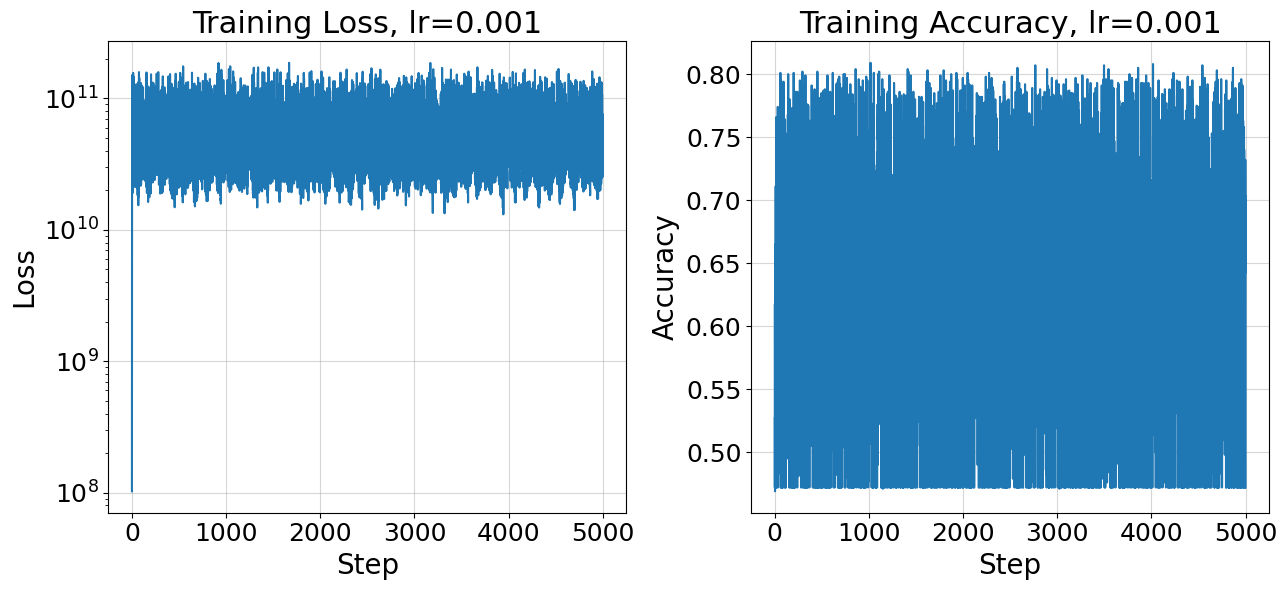

In [90]:
# plot learning curves for svm over different learning rates

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

def plot_learning_curve_for_svm(lr):
    C=1e5
    clf = SoftSVM(C=C, lr=lr)
    X_train_poly = PolynomialFeatures(degree=3,).fit_transform(X_train)
    X_train_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_train_poly)
    losses, accuracies = clf.fit_with_logs(X_train_poly, y_train, max_iter=5000)
    plt.figure(figsize=(13, 6))
    plt.subplot(121), plt.grid(alpha=0.5), plt.title (f"Training Loss, lr={lr}")
    plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
    plt.subplot(122), plt.grid(alpha=0.5), plt.title (f"Training Accuracy, lr={lr}")
    plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()


for lr in list(np.logspace(-11, -3, 5)):
    plot_learning_curve_for_svm(lr)

In [91]:
# train an svm using the chosen learning rate using Pipeline

from sklearn.pipeline import Pipeline

svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3,)),
                    ('scaler', MinMaxScaler()),
                    ('SVM', SoftSVM(C=1e5, lr=1e-7))])
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('feature_mapping', PolynomialFeatures(degree=3)),
                ('scaler', MinMaxScaler()),
                ('SVM', SoftSVM(C=100000.0, lr=1e-07))])

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


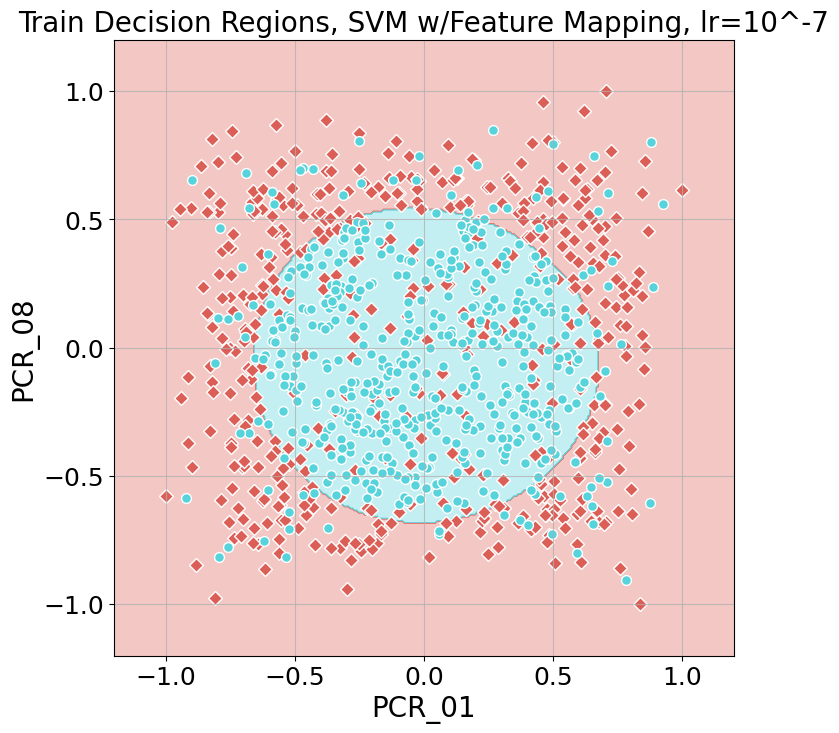

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


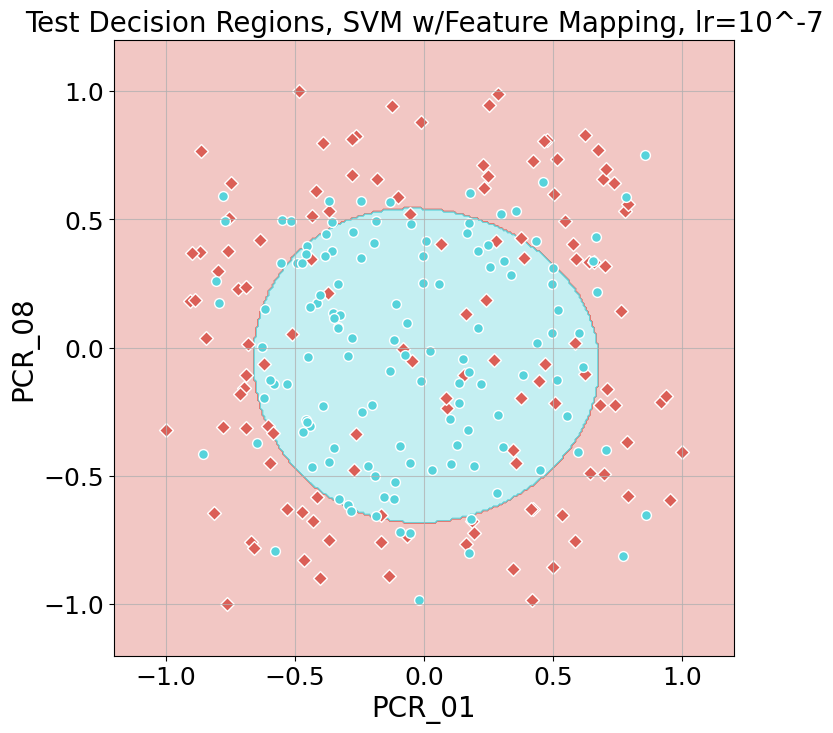

In [92]:
# visualize the decision regions of the svm

X_test = np.array(test[["PCR_01","PCR_08"]].copy())
y_test = np.array(test[["spread"]].copy())
visualize_clf(svm_clf, X_train, y_train, "Train Decision Regions, SVM w/Feature Mapping, lr=10^-7", "PCR_01", "PCR_08")
visualize_clf(svm_clf, X_test, y_test, "Test Decision Regions, SVM w/Feature Mapping, lr=10^-7", "PCR_01", "PCR_08")

In [93]:
# get the accuracies of the svm model

print(f"The model's train accuracy is: {svm_clf.score(X_train, y_train) * 100}%.")
print(f"The model's test accuracy is: {svm_clf.score(X_test, y_test) * 100}%.")

The model's train accuracy is: 80.2%.
The model's test accuracy is: 74.8%.


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


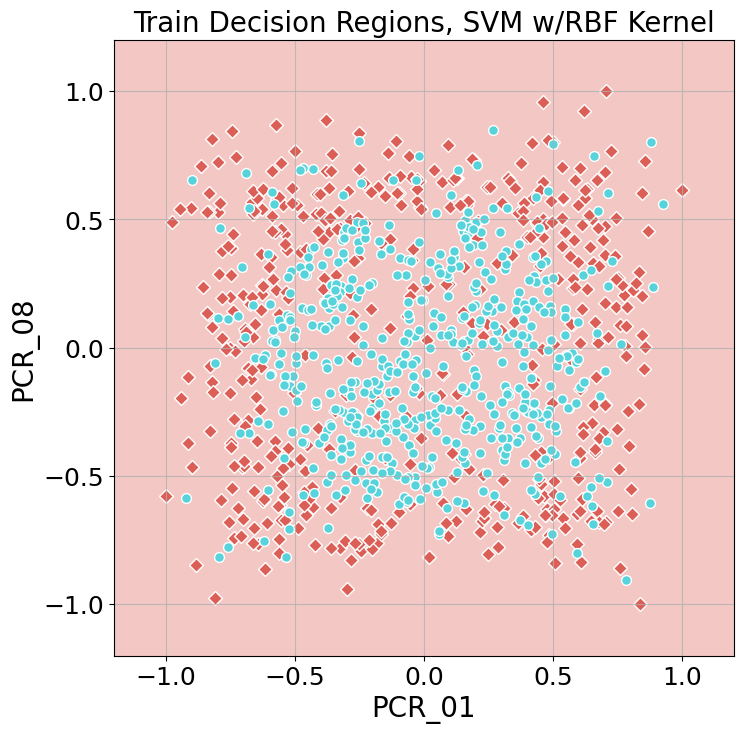

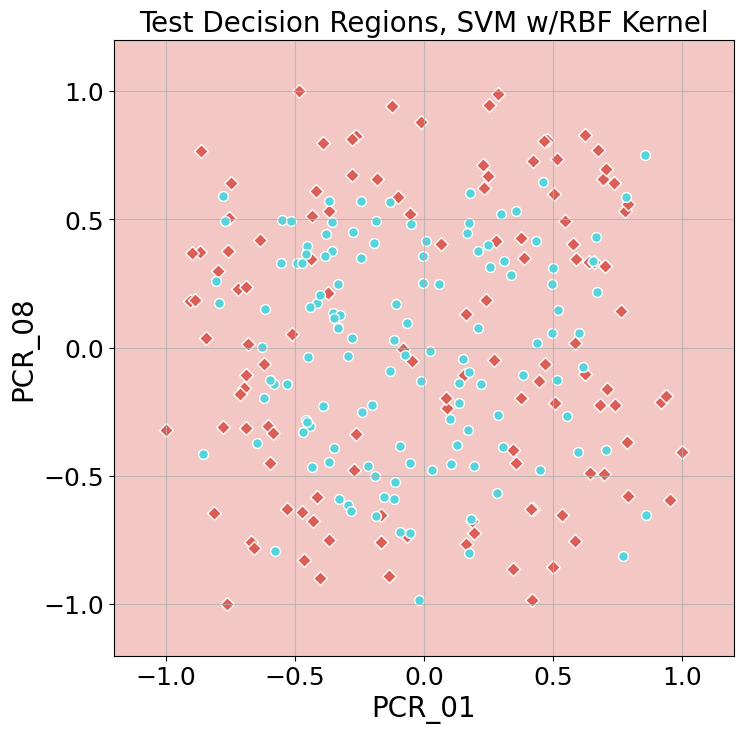

The model's train accuracy is: 52.800000000000004%.
The model's test accuracy is: 51.2%.


In [94]:
# train an rbf svm model with gamma = 1e-7

from sklearn.svm import SVC

rbf_svm = SVC(kernel='rbf', C=1.0, gamma=1e-7)
rbf_svm.fit(X_train,y_train)
visualize_clf(rbf_svm, X_train, y_train, "Train Decision Regions, SVM w/RBF Kernel", "PCR_01", "PCR_08")
visualize_clf(rbf_svm, X_test, y_test, "Test Decision Regions, SVM w/RBF Kernel", "PCR_01", "PCR_08")
print(f"The model's train accuracy is: {rbf_svm.score(X_train, y_train) * 100}%.")
print(f"The model's test accuracy is: {rbf_svm.score(X_test, y_test) * 100}%.")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


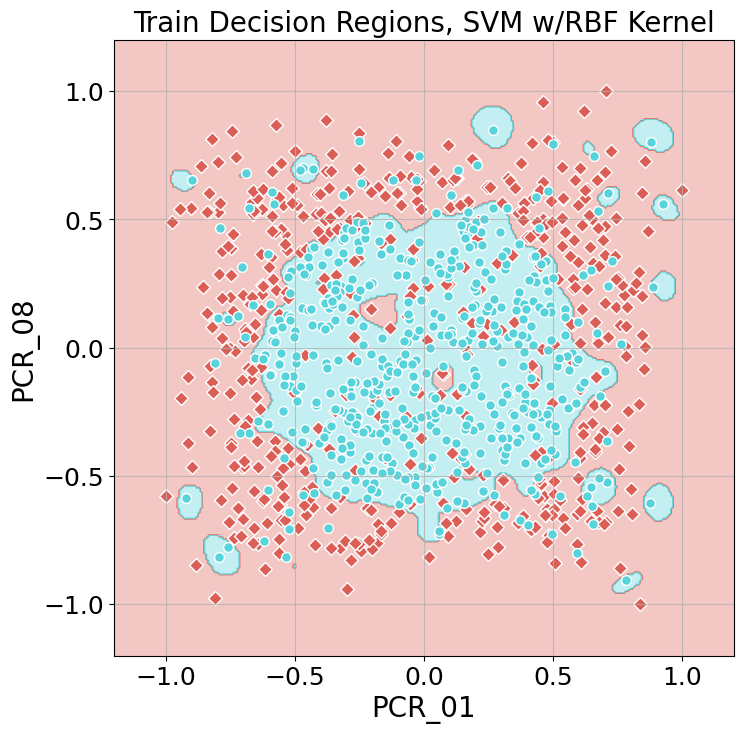

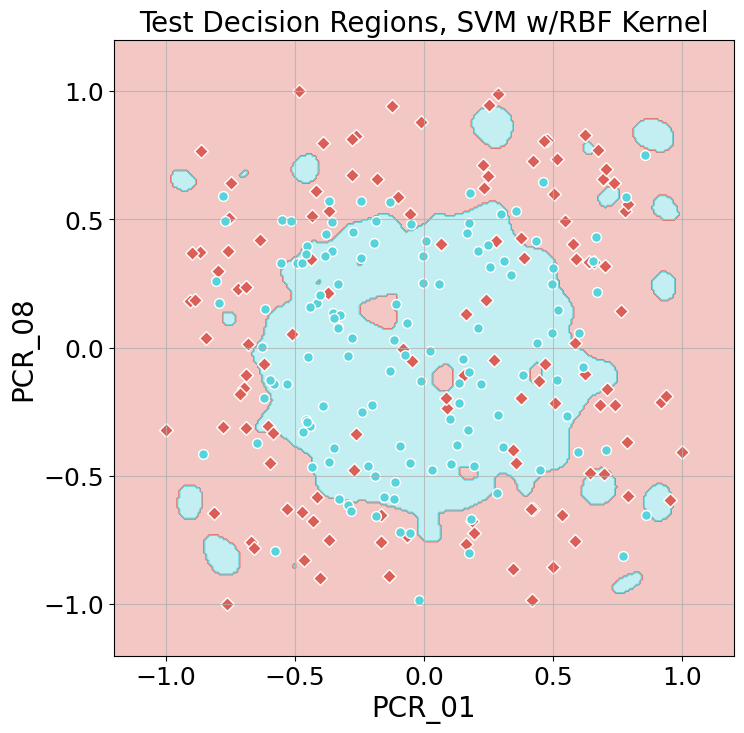

The model's train accuracy is: 85.1%.
The model's test accuracy is: 72.8%.


In [95]:
# train an rbf svm model with gamma = 200

rbf_svm = SVC(kernel='rbf', C=1.0, gamma=200)
rbf_svm.fit(X_train,y_train)
visualize_clf(rbf_svm, X_train, y_train, "Train Decision Regions, SVM w/RBF Kernel", "PCR_01", "PCR_08")
visualize_clf(rbf_svm, X_test, y_test, "Test Decision Regions, SVM w/RBF Kernel", "PCR_01", "PCR_08")
print(f"The model's train accuracy is: {rbf_svm.score(X_train, y_train) * 100}%.")
print(f"The model's test accuracy is: {rbf_svm.score(X_test, y_test) * 100}%.")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


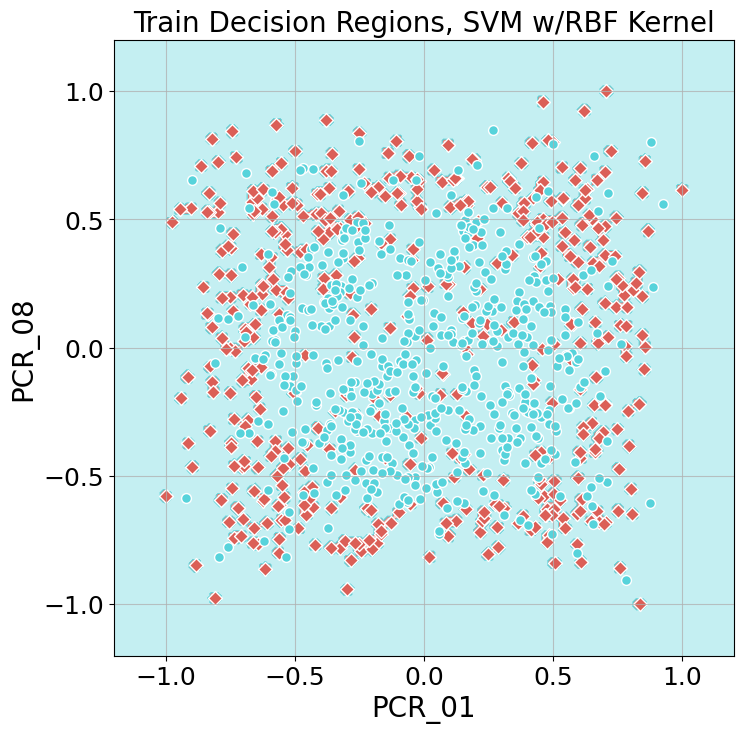

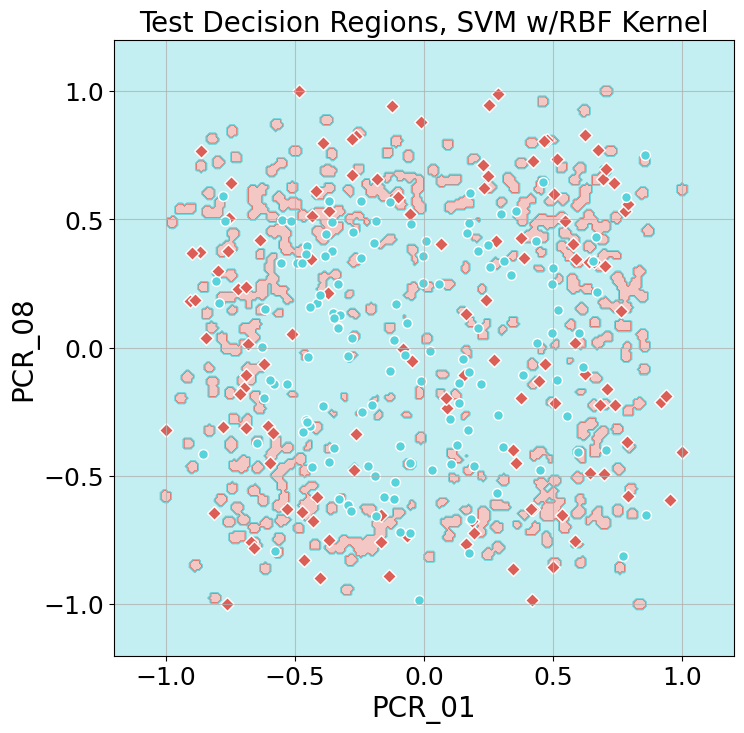

The model's train accuracy is: 99.3%.
The model's test accuracy is: 57.599999999999994%.


In [96]:
# train an rbf svm model with gamma = 5000

rbf_svm = SVC(kernel='rbf', C=1.0, gamma=5000)
rbf_svm.fit(X_train,y_train)
visualize_clf(rbf_svm, X_train, y_train, "Train Decision Regions, SVM w/RBF Kernel", "PCR_01", "PCR_08")
visualize_clf(rbf_svm, X_test, y_test, "Test Decision Regions, SVM w/RBF Kernel", "PCR_01", "PCR_08")
print(f"The model's train accuracy is: {rbf_svm.score(X_train, y_train) * 100}%.")
print(f"The model's test accuracy is: {rbf_svm.score(X_test, y_test) * 100}%.")

# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)